In this file, two different machine learning models will be developed and trained to predict machine failure based on different feautures.

The dataset is taken from https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset and will include following features:

- Air temperature [K]

- Process temperature [K]

- Rotational speed [RPM]

- Torque [Nm]

- Tool wear [min]

The target variable will be 0 (no failure) and 1 (failure) to indicate the prediction of machine failure.

The chosen machine learning models will be logistic regression and random forest.

We start by importing the necessary libraries and loading the data. We will be using pandas for data handling, seaborn and matplotlib for visualizations and sklearn for the machine learning models

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
data = pd.read_csv(url)

Now we check the data for null values. If any values are null, we delete the entire row.

In [229]:
print("Checking for null values...")
print(data.isnull().sum())  # Prints the count of null values in each column
data.dropna(inplace=True)  # Drop rows with null values
print("After removing null values, data shape:", data.shape)

Checking for null values...
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64
After removing null values, data shape: (10000, 14)


We then plot a heatmap so get a visualization of the correlation between the 5 different features that will be used later in our models.

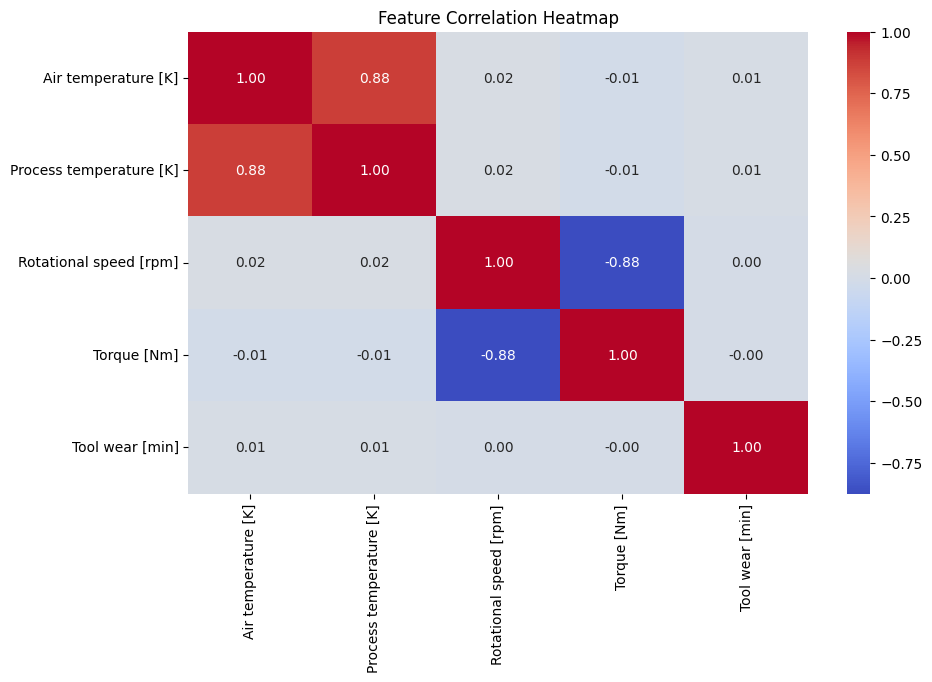

In [230]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
            'Torque [Nm]', 'Tool wear [min]']

numeric_data = data[features]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

We now split the data for training/test and choose the features we want, with a training size of 20% and test size of 80%

In [231]:
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
          'Torque [Nm]', 'Tool wear [min]']]  # Features
y = data['Machine failure']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can now use a model to train on the data. We train a model both for the logistic regression and random forest

In [232]:
modelLR = LogisticRegression(class_weight='balanced', random_state=42)
modelLR.fit(X_train, y_train)

modelRFC = RandomForestClassifier(class_weight='balanced', random_state=42)
modelRFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

We can now make a prediction on the test set for a target value for both models

In [233]:
y_predLR = modelLR.predict(X_test)
y_predRFC = modelRFC.predict(X_test)

Now we want to evaluate the performance of the models. We make a confusion matrix for both the models and visualize it

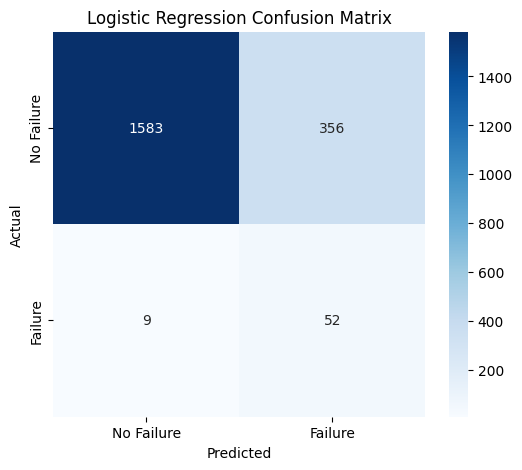

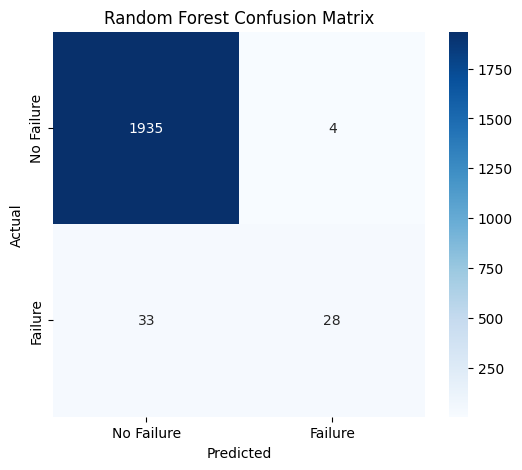

In [234]:
# Confusion Matrix for Logistic Regression
conf_matrixLR = confusion_matrix(y_test, y_predLR)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrixLR, annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for Random Forest Classifier
conf_matrixRFC = confusion_matrix(y_test, y_predRFC)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrixRFC, annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


We then make a classification report to see the different metrics for evaluating the models. 

In [235]:
# Classification Report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_predLR))

# Classification Report for Random Forest Classifier
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_predRFC))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1939
           1       0.13      0.85      0.22        61

    accuracy                           0.82      2000
   macro avg       0.56      0.83      0.56      2000
weighted avg       0.97      0.82      0.88      2000


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.88      0.46      0.60        61

    accuracy                           0.98      2000
   macro avg       0.93      0.73      0.80      2000
weighted avg       0.98      0.98      0.98      2000



We now store the metrics for both models in a dictionary, convert it to a pandas DataFrame and make a barplot to visualize the performance of both models agaisnt eachother.


Model Comparison:
                      Model  Accuracy  Precision (class 1)  Recall (class 1)  \
0       Logistic Regression    0.8175             0.127451          0.852459   
1  Random Forest Classifier    0.9815             0.875000          0.459016   

   F1-Score (class 1)  
0            0.221748  
1            0.602151  


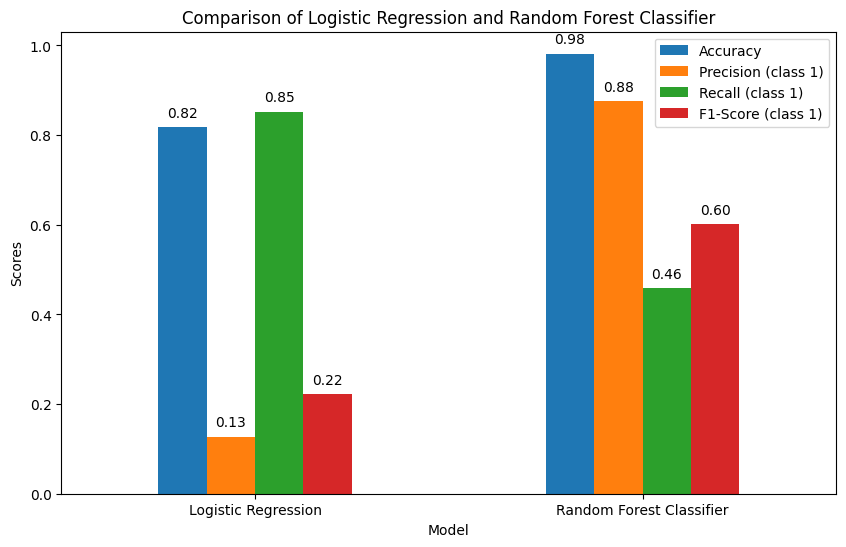

In [236]:
# Create a dictionary to store metrics for both models
metrics = {
    "Model": ["Logistic Regression", "Random Forest Classifier"],
    "Accuracy": [accuracy_score(y_test, y_predLR), accuracy_score(y_test, y_predRFC)],
    "Precision (class 1)": [classification_report(y_test, y_predLR, output_dict=True)["1"]["precision"],
                            classification_report(y_test, y_predRFC, output_dict=True)["1"]["precision"]],
    "Recall (class 1)": [classification_report(y_test, y_predLR, output_dict=True)["1"]["recall"],
                         classification_report(y_test, y_predRFC, output_dict=True)["1"]["recall"]],
    "F1-Score (class 1)": [classification_report(y_test, y_predLR, output_dict=True)["1"]["f1-score"],
                           classification_report(y_test, y_predRFC, output_dict=True)["1"]["f1-score"]],
}

# Convert metrics dictionary to DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics)

print("\nModel Comparison:")
print(metrics_df)

# Visualize the comparison in a bar plot
ax = metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 10), textcoords='offset points', ha='center', va='center')

plt.title("Comparison of Logistic Regression and Random Forest Classifier")
plt.ylabel("Scores")
plt.xticks(rotation=0)
plt.show()